<a href="https://colab.research.google.com/github/l642/vgg16/blob/main/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_path = '/content/drive/MyDrive/training_set/training_set'
valid_path = '/content/drive/MyDrive/test_set/test_set'

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58892288/58889256 [==============================] - 0s 0us/step


In [5]:
for layer in vgg.layers:
  layer.trainable = False
  

In [6]:
folders = glob('/content/drive/MyDrive/training_set/training_set/*')

In [7]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/training_set/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8015 images belonging to 2 classes.


In [11]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/test_set/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2023 images belonging to 2 classes.


In [12]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
251/251 [==============================] - 3555s 14s/step - loss: 0.4190 - accuracy: 0.8045 - val_loss: 0.2328 - val_accuracy: 0.8987
Epoch 2/5
251/251 [==============================] - 116s 462ms/step - loss: 0.2071 - accuracy: 0.9110 - val_loss: 0.2174 - val_accuracy: 0.9165
Epoch 3/5
251/251 [==============================] - 116s 461ms/step - loss: 0.1918 - accuracy: 0.9250 - val_loss: 0.1935 - val_accuracy: 0.9254
Epoch 4/5
251/251 [==============================] - 116s 463ms/step - loss: 0.1528 - accuracy: 0.9377 - val_loss: 0.2530 - val_accuracy: 0.9130
Epoch 5/5
251/251 [==============================] - 116s 462ms/step - loss: 0.1416 - accuracy: 0.9415 - val_loss: 0.2315 - val_accuracy: 0.9219


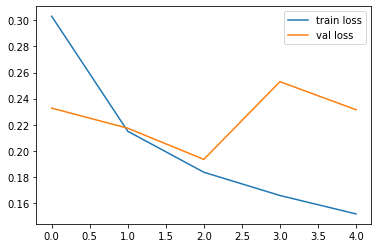

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

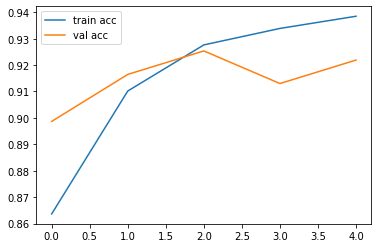

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')